In [10]:
# Created by Samuel Horovatin, University of Saskatchewan, Sept 2021

# Data Processing Imports
import pandas as pd
import os
import skimage # DO NOT LEAVE IN, break down to specifics required for preprocessing
from skimage.color import rgb2hsv
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from plantcv import plantcv as pcv
import cv2

# Logger Imports
import time
import logging
import sys
from logging.handlers import TimedRotatingFileHandler

In [14]:
# Some setup for when this is setup to run concurrently

plt.rcParams["figure.figsize"] = [8, 8]

class options:
    def __init__(self):
        # Input image path/filename
        self.img_dir = ""
        self.extention_pattern = ""
        # Debug mode = None, "plot", or "print"
        self.debug = "plot" #DO NOT SET TO PLOT FOR BIG DATA RUNS.
        self.writeimg = False
        self.result = "results.txt"
        self.outdir = "/birl2/users/sch923/Thesis/Data/output/"

# Initialize options
args = options()
# Set PlantCV debug mode to input debug method
pcv.params.debug = args.debug
# Increase text size in plots
pcv.params.text_size = 20
pcv.params.text_thickness = 10

In [2]:
# Sets up logger configuration
# Sourced from Son Nguyen Kim's article https://www.toptal.com/python/in-depth-python-loggingß

FORMATTER = logging.Formatter("%(asctime)s —  %(levelname)s — %(message)s")
LOG_FILE = "multi_kernel.log"

def get_console_handler():
    console_handler = logging.StreamHandler(sys.stdout)
    console_handler.setFormatter(FORMATTER)
    return console_handler

def get_file_handler():
    file_handler = TimedRotatingFileHandler(LOG_FILE, when='midnight')
    file_handler.setFormatter(FORMATTER)
    return file_handler

def get_logger(logger_name):
    logger = logging.getLogger(logger_name)
    
    if (logger.hasHandlers()): 
        logger.handlers.clear()
    logger.setLevel(logging.DEBUG) 
    logger.addHandler(get_console_handler())
    logger.addHandler(get_file_handler())
    logger.propagate = False
    return logger

logger = get_logger("MK") # MK for multi kernel

In [3]:
# Define locations of infected and healthy kernels, as well as the color correction images

I_MULTI_KERNEL = "/birl2/users/sch923/Thesis/Data/test_images_sept21/DSC_0499.JPG"
H_MULTI_KERNEL = "/birl2/users/sch923/Thesis/Data/test_images_sept21/DSC_0490.JPG"
COLOR_CORRECT_DARK = "/birl2/users/sch923/Thesis/Data/test_images_sept21/DSC_0491.JPG"
COLOR_CORRECT_LIGHT = "/birl2/users/sch923/Thesis/Data/test_images_sept21/DSC_0492.JPG"
TAPE_WIDTH = 12.7 # In millimetres

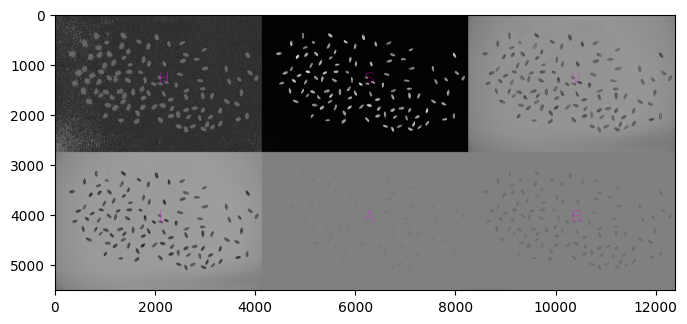

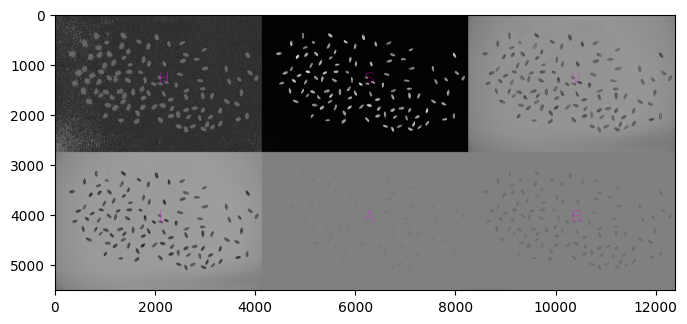

In [22]:
 for multi_wheat_img in img_arrays:
    
    cs_plot = pcv.visualize.colorspaces(rgb_img=multi_wheat_img, original_img=False)

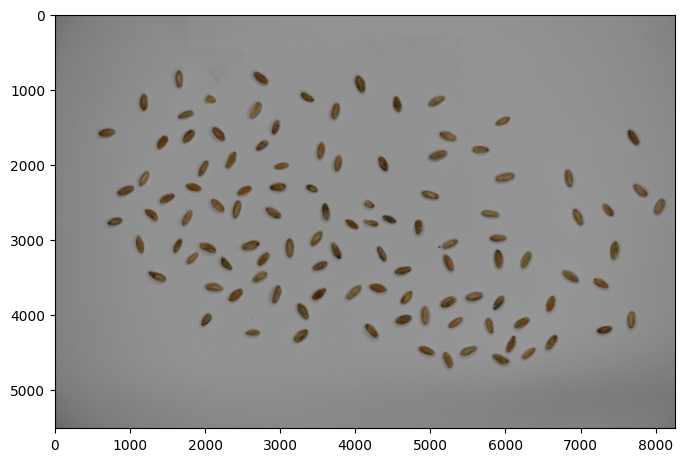

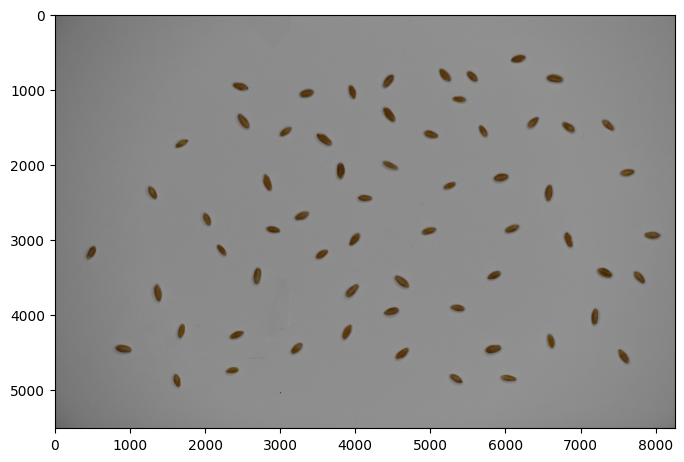

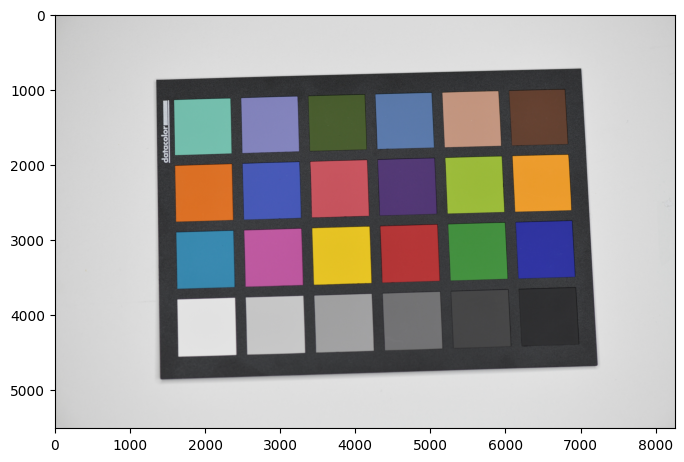

2021-09-23 14:45:08,843 —  INFO — Multi-kernel image loaded succesfully


In [28]:
# Load images into arrays

i_multi_img, i_path, i_fname=pcv.readimage(I_MULTI_KERNEL)
h_multi_img, h_path, h_fname=pcv.readimage(H_MULTI_KERNEL)
color_correction_flat_array=pcv.readimage(COLOR_CORRECT_LIGHT)

img_arrays = [i_multi_array]
logger.info(f'Multi-kernel image loaded succesfully') 


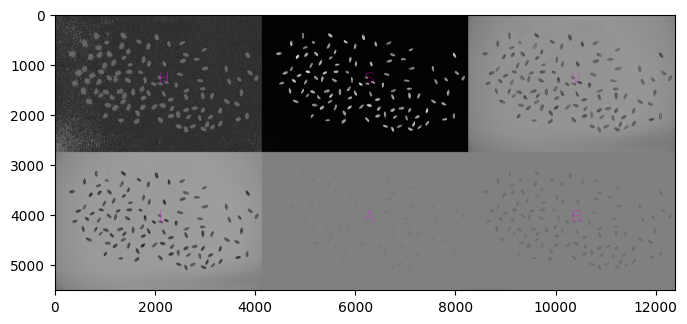

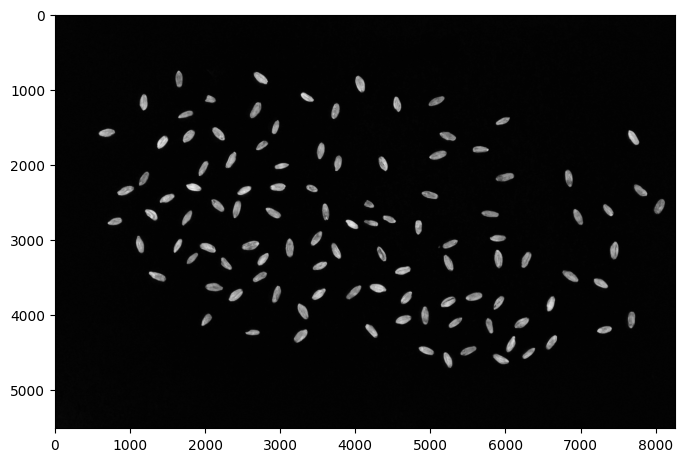

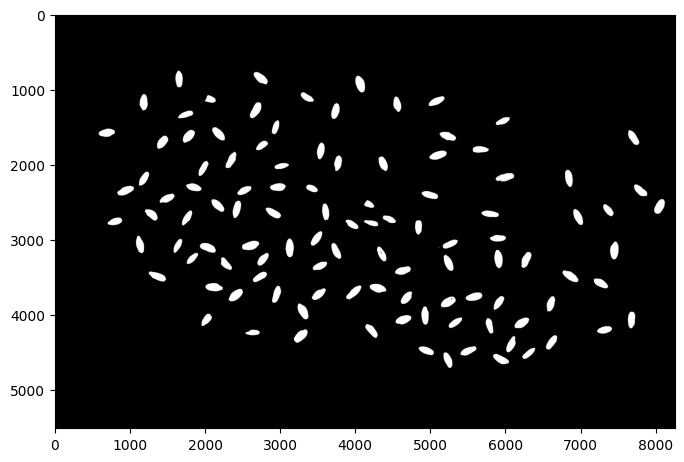

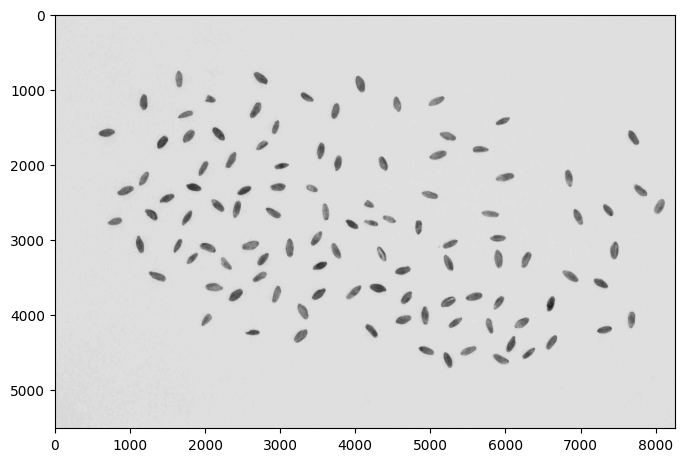

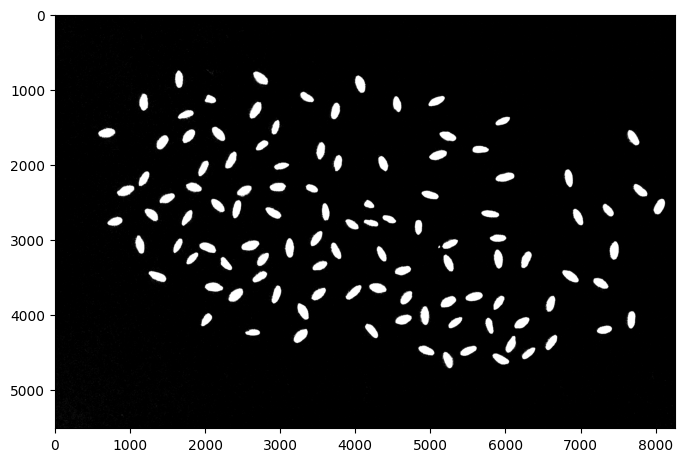

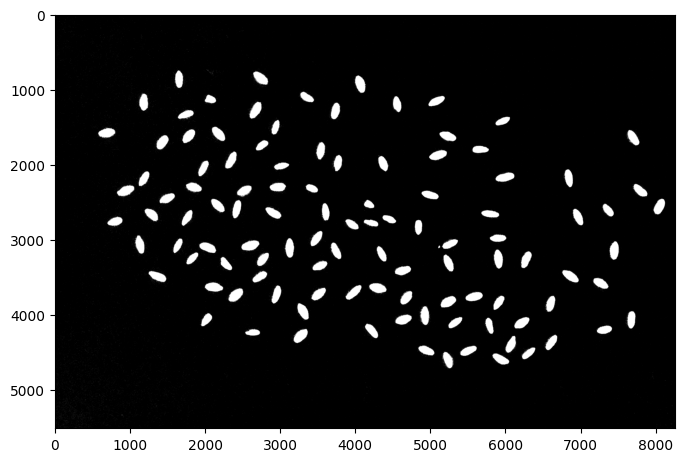

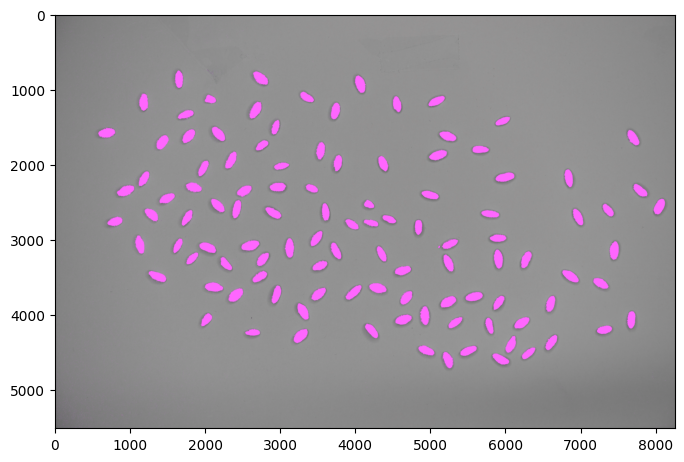

error: OpenCV(3.4.15) :-1: error: (-5:Bad argument) in function 'boundingRect'
> Overload resolution failed:
>  - array is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'array'


In [91]:
for img in img_arrays:
    cs_plot = pcv.visualize.colorspaces(rgb_img=img, original_img=False)
    s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
    s_thresh = pcv.threshold.binary(gray_img=s, threshold=60, max_value=255, object_type='light') # threshold is 60 to remove little lentil flecks
    b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
    b_thresh = pcv.threshold.binary(gray_img=b, threshold=125, max_value=255, object_type='dark')    
    bs = pcv.logical_or(bin_img1=s_thresh, bin_img2=b_thresh)
    # After the bs mask was created, I found little need to further process the image, as the mask never really improved in quality
    
    id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=bs)
    crop_img = pcv.auto_crop(img=img, obj=id_objects, padding_x=10, padding_y=10, color='black')